In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [3]:

Data = {'n_channel' : [15180, 770, 1620, 13820],'b_channel': [4000, 50, 300, 3200] , 'r_channel' : [10900, 150, 960, 8400] , 'Energy': [662, 26.3, 59.6, 511 ]  }
df = pd.DataFrame(data= Data)

df

,n_channel,b_channel,r_channel,Energy
0,15180,4000,10900,662.0
1,770,50,150,26.3
2,1620,300,960,59.6
3,13820,3200,8400,511.0


In [4]:
f = 'Energy'
df[f]

0    662.0
1     26.3
2     59.6
3    511.0
Name: Energy, dtype: float64

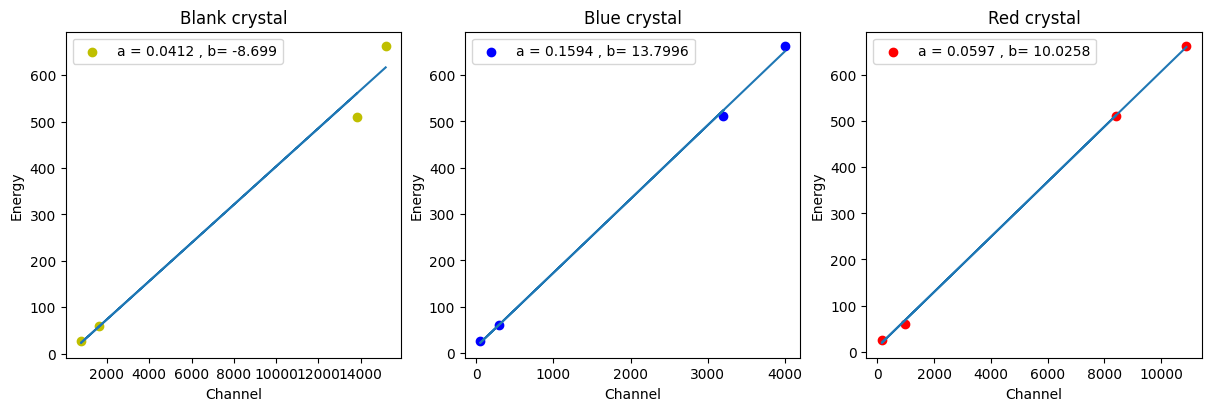

In [5]:

fig, ax= plt.subplots(1,3, figsize=(12,4), constrained_layout= True)


Title= ['Blank crystal' , 'Blue crystal' , 'Red crystal']
crystal = ['n_channel' , 'b_channel' , 'r_channel']
colors= ["y","b", "r"]
for i in range(3):
    a , b = np.polyfit(df[crystal[i]], df['Energy'] ,1 )

    ax[i].scatter(df[crystal[i]], df['Energy'], c= colors[i] , label= f"a = {round(a, 4)} , b= {round(b , 4)}")
    ax[i].set_title(Title[i])
    ax[i].plot(df[crystal[i]], a*df[crystal[i]]+b)
for k in range(3):
    ax[k].set_xlabel("Channel") ; ax[k].set_ylabel("Energy")
    ax[k].legend()

# plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Graphs/Channel to E conversion.png', dpi=300, bbox_inches='tight')

plt.show()


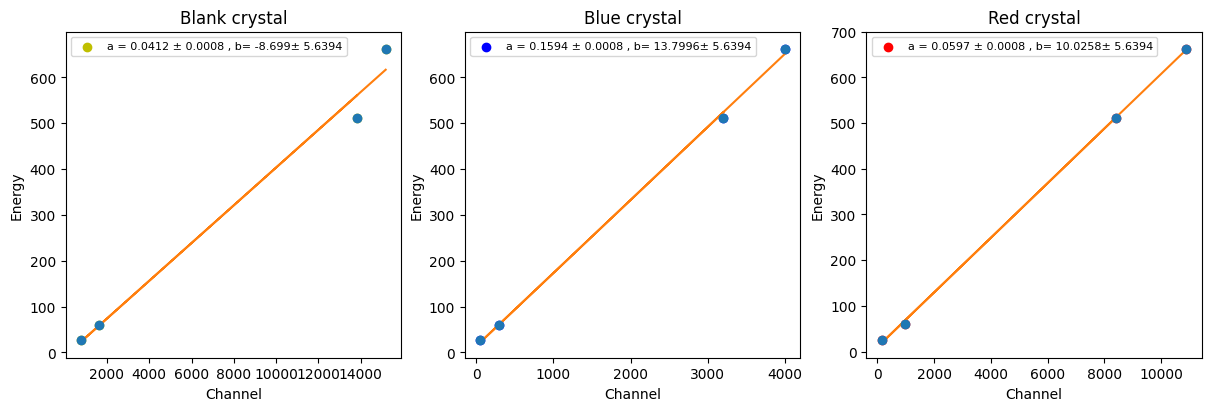

In [6]:
fig, ax= plt.subplots(1,3, figsize=(12,4), constrained_layout= True)
def linear_model(x, m, b):
    return m * x + b

Title= ['Blank crystal' , 'Blue crystal' , 'Red crystal']
crystal = ['n_channel' , 'b_channel' , 'r_channel']
colors= ["y","b", "r"]
for i in range(3):
    params, covariance = curve_fit(linear_model,df["r_channel"], df['Energy'])
    correlation_matrix = np.corrcoef(covariance)
    uncertainties = np.sqrt(np.diag(covariance))
    slope_uncertainty, intercept_uncertainty = uncertainties


    a , b = np.polyfit(df[crystal[i]], df['Energy'] ,1 )
    ax[i].errorbar(df[crystal[i]], df['Energy'], yerr=uncertainties[1], fmt='o')
    ax[i].scatter(df[crystal[i]], df['Energy'], c= colors[i] , label= f"a = {round(a, 4)} ± {round(slope_uncertainty,4)} , b= {round(b , 4)}± {round(intercept_uncertainty,4)}")
    ax[i].set_title(Title[i])
    ax[i].plot(df[crystal[i]],linear_model(a,df[crystal[i]], b))
for k in range(3):
    ax[k].set_xlabel("Channel") ; ax[k].set_ylabel("Energy")
    ax[k].legend(loc= "best" , fontsize= 8)

    plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Graphs/Channel to E conversion.png', dpi=300, bbox_inches='tight')
